# Import Libraries and Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Reading csv file
data = pd.read_csv('USA_Housing.csv')
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# Exploratory Data Analysis

In [3]:
data.info()#print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
# Checking null values
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
data.describe()# Generate descriptive statistics summarizing central tendency, dispersion, and shape of dataset's distribution.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
# Data Claening
df = pd.DataFrame()
df['Income'] = data['Avg. Area Income'].round(2)# Round 'Avg. Area Income' to 2 decimal places and store in 'Income'.
df['House Age'] = data['Avg. Area House Age'].apply(int)# Converting 'Avg. Area House Age' to integers and adding it to 'df' as 'House Age'.
df['No. of Rooms'] = data['Avg. Area Number of Rooms'].apply(int)# Converting 'Avg. Area Number of Rooms' to integers and adding it to 'df' as 'No. of Rooms'.
df['No. of Bedrooms'] = data['Avg. Area Number of Bedrooms'].apply(int)# Converting 'Avg. Area Number of Bedrooms' to integers and adding it to 'df' as 'No. of Bedrooms'.
df['Population'] = data['Area Population'].apply(int)# Converting 'Area Population' to integers and adding it to 'df' as 'Population'.
df['Price'] = data['Price'].apply(int)# Converting 'Price' to integers and adding it to 'df' as 'Price'.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


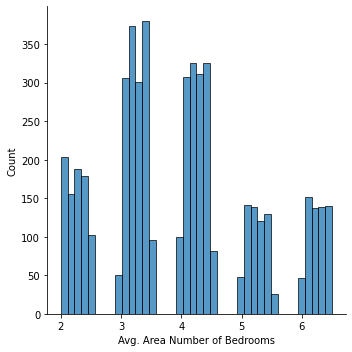

In [7]:
sns.displot(data['Avg. Area Number of Bedrooms'], kde=False, bins=40)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Price', ylabel='Density'>

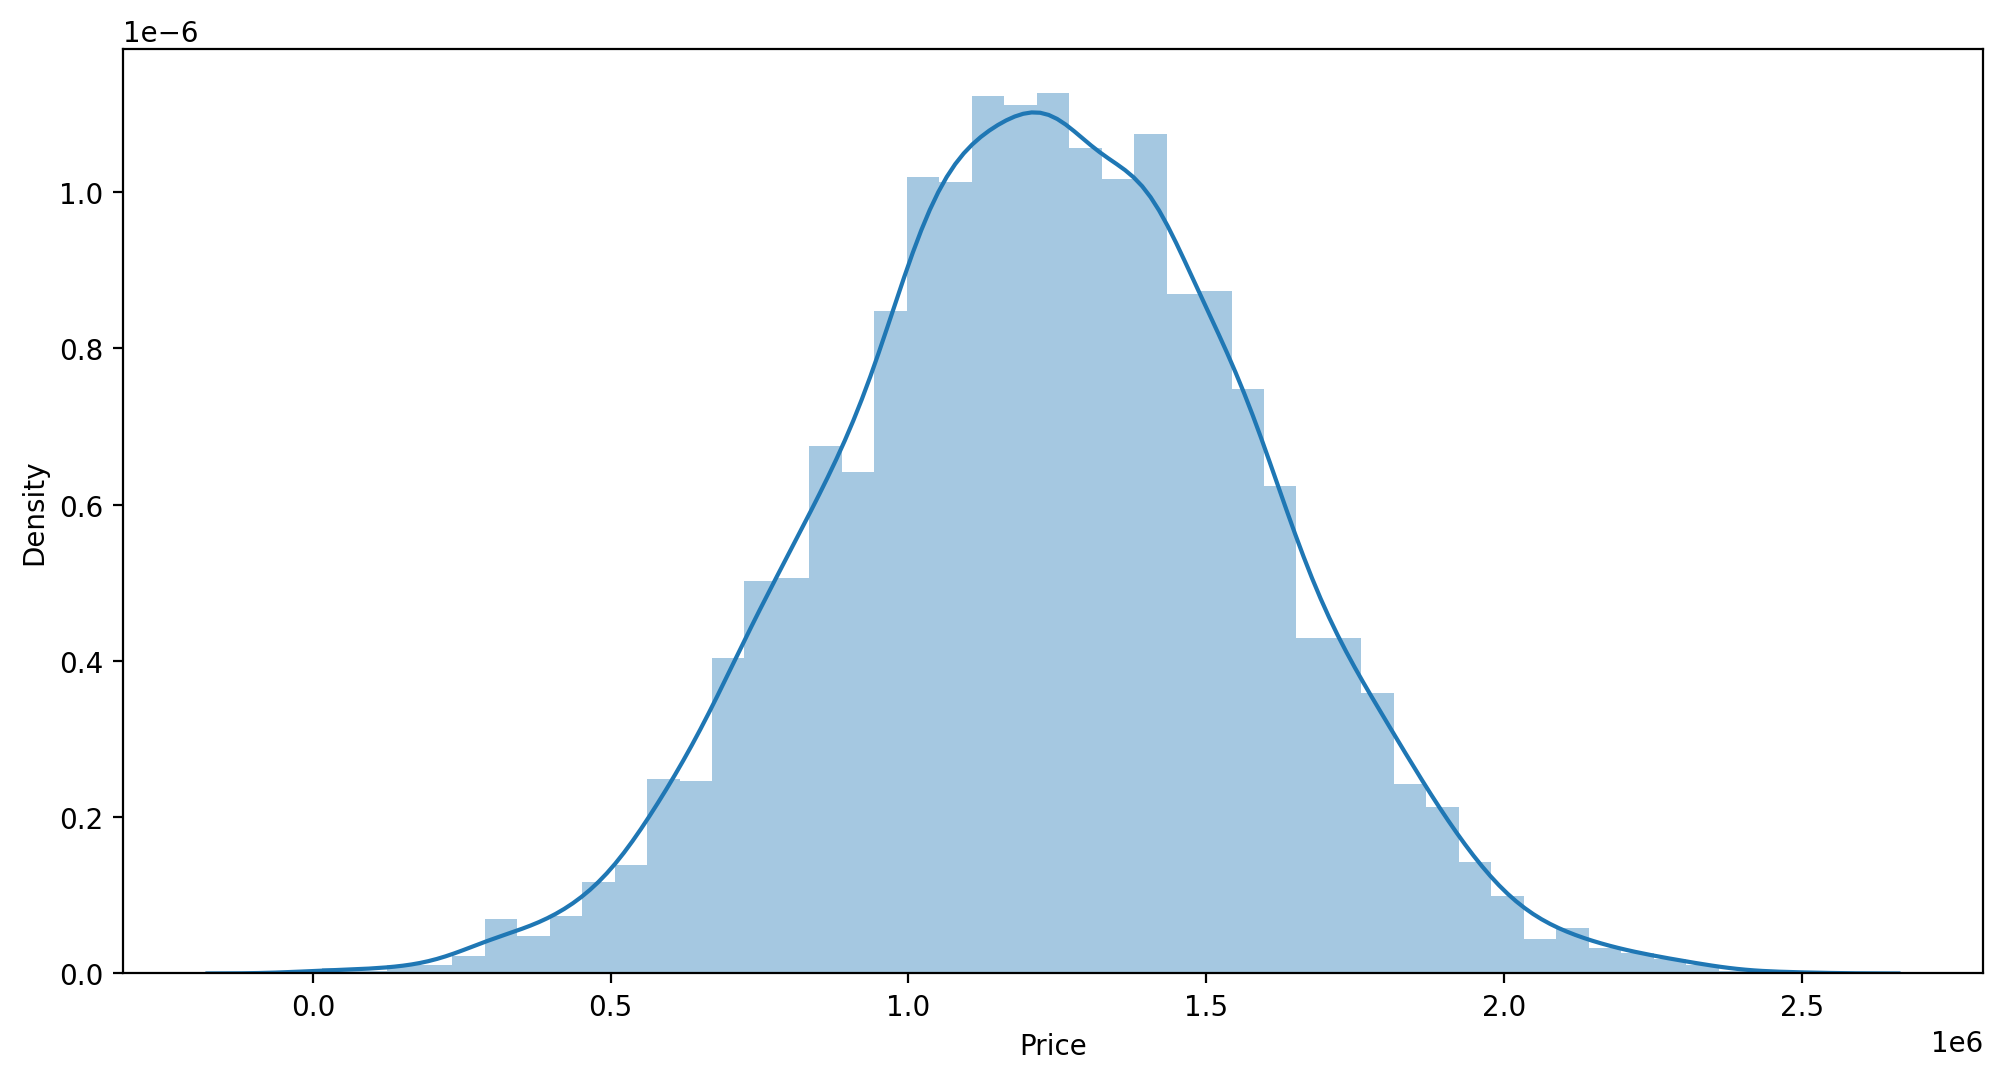

In [8]:
# Price plot
plt.figure(figsize = (12, 6), dpi = 200)
sns.distplot(data.Price)

<Axes: xlabel='Income', ylabel='Price'>

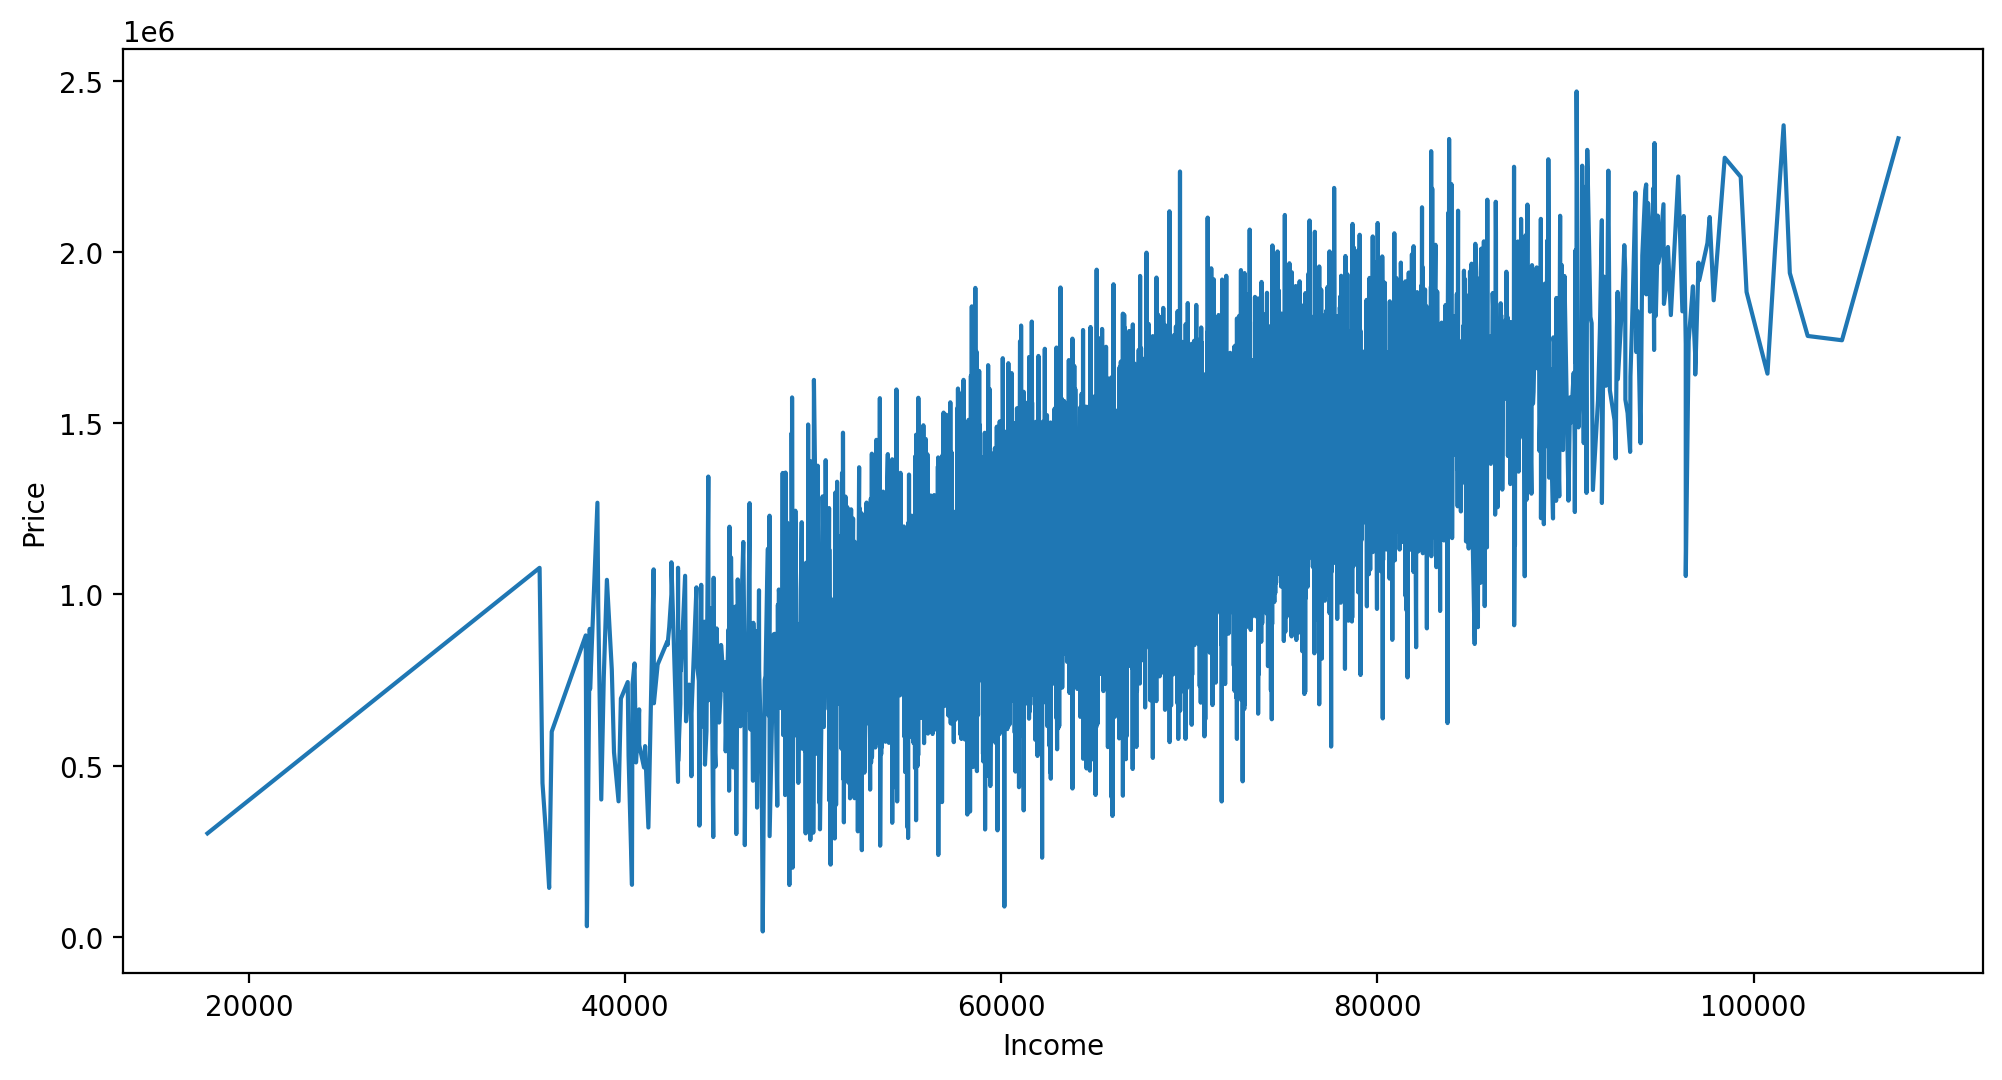

In [9]:
# Price wrt Income
plt.figure(figsize = (12, 6), dpi = 200)
sns.lineplot(x = 'Income', y = 'Price', data = df)

<Axes: xlabel='House Age', ylabel='Price'>

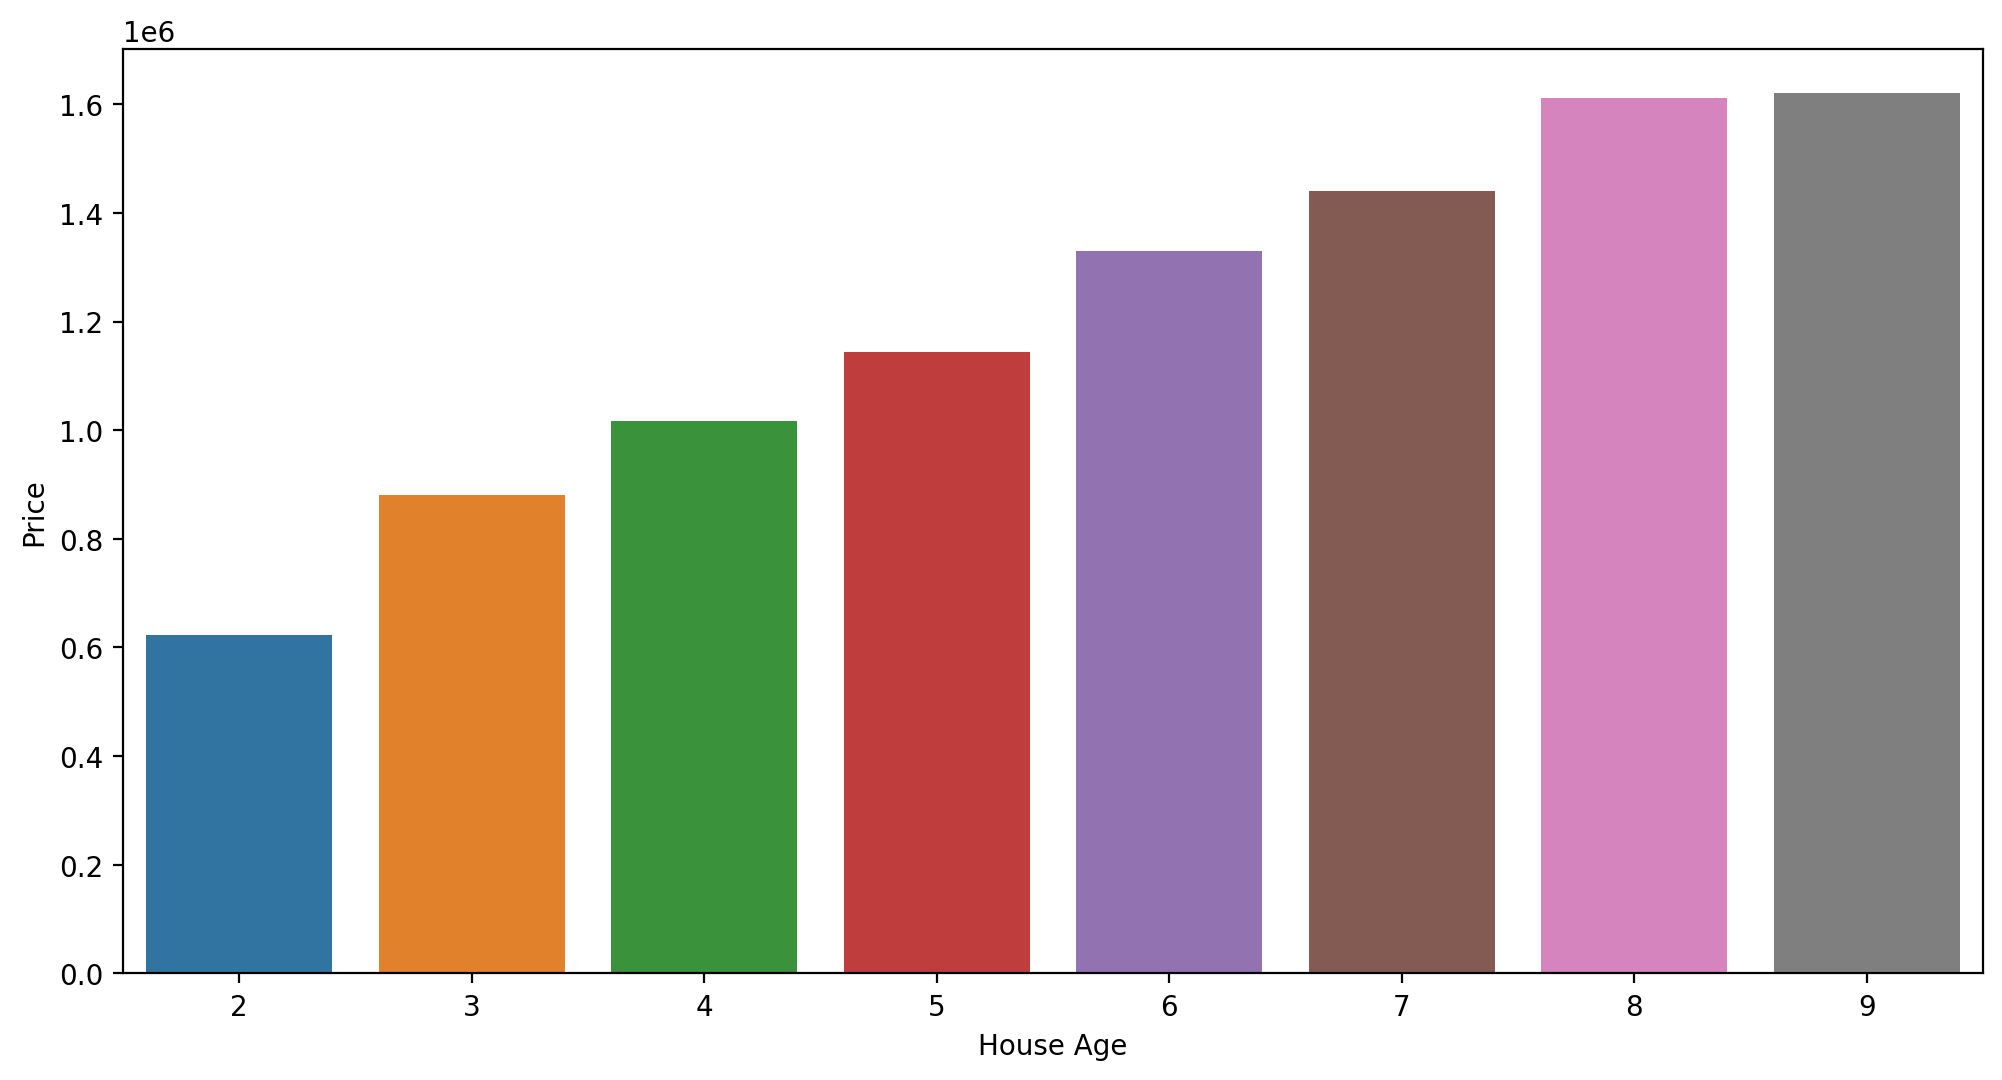

In [10]:
# Price wrt House Age
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

<Axes: xlabel='No. of Rooms', ylabel='Price'>

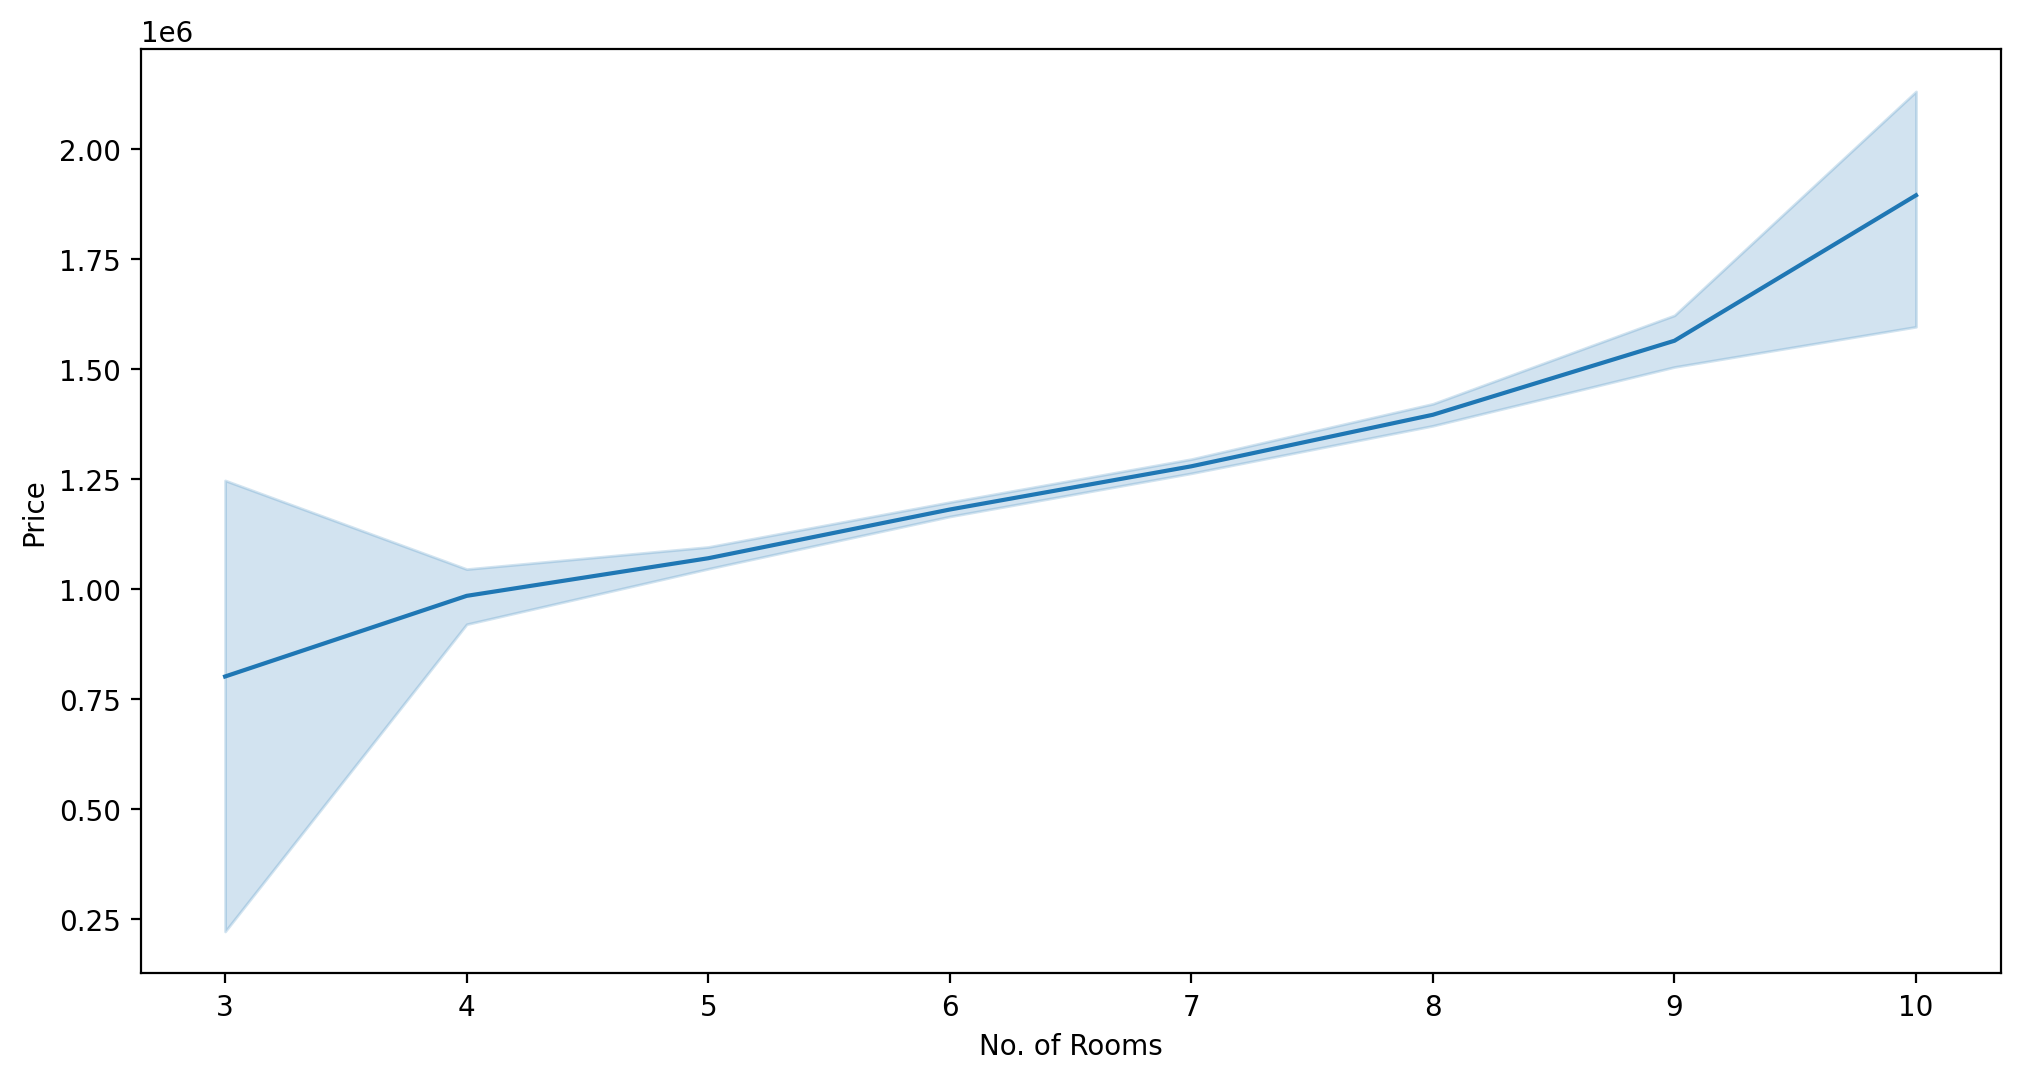

In [11]:
# Price wrt No. of Rooms
plt.figure(figsize = (12, 6), dpi = 200)
sns.lineplot(x = 'No. of Rooms', y = 'Price', data = df)

<Axes: xlabel='No. of Bedrooms', ylabel='Price'>

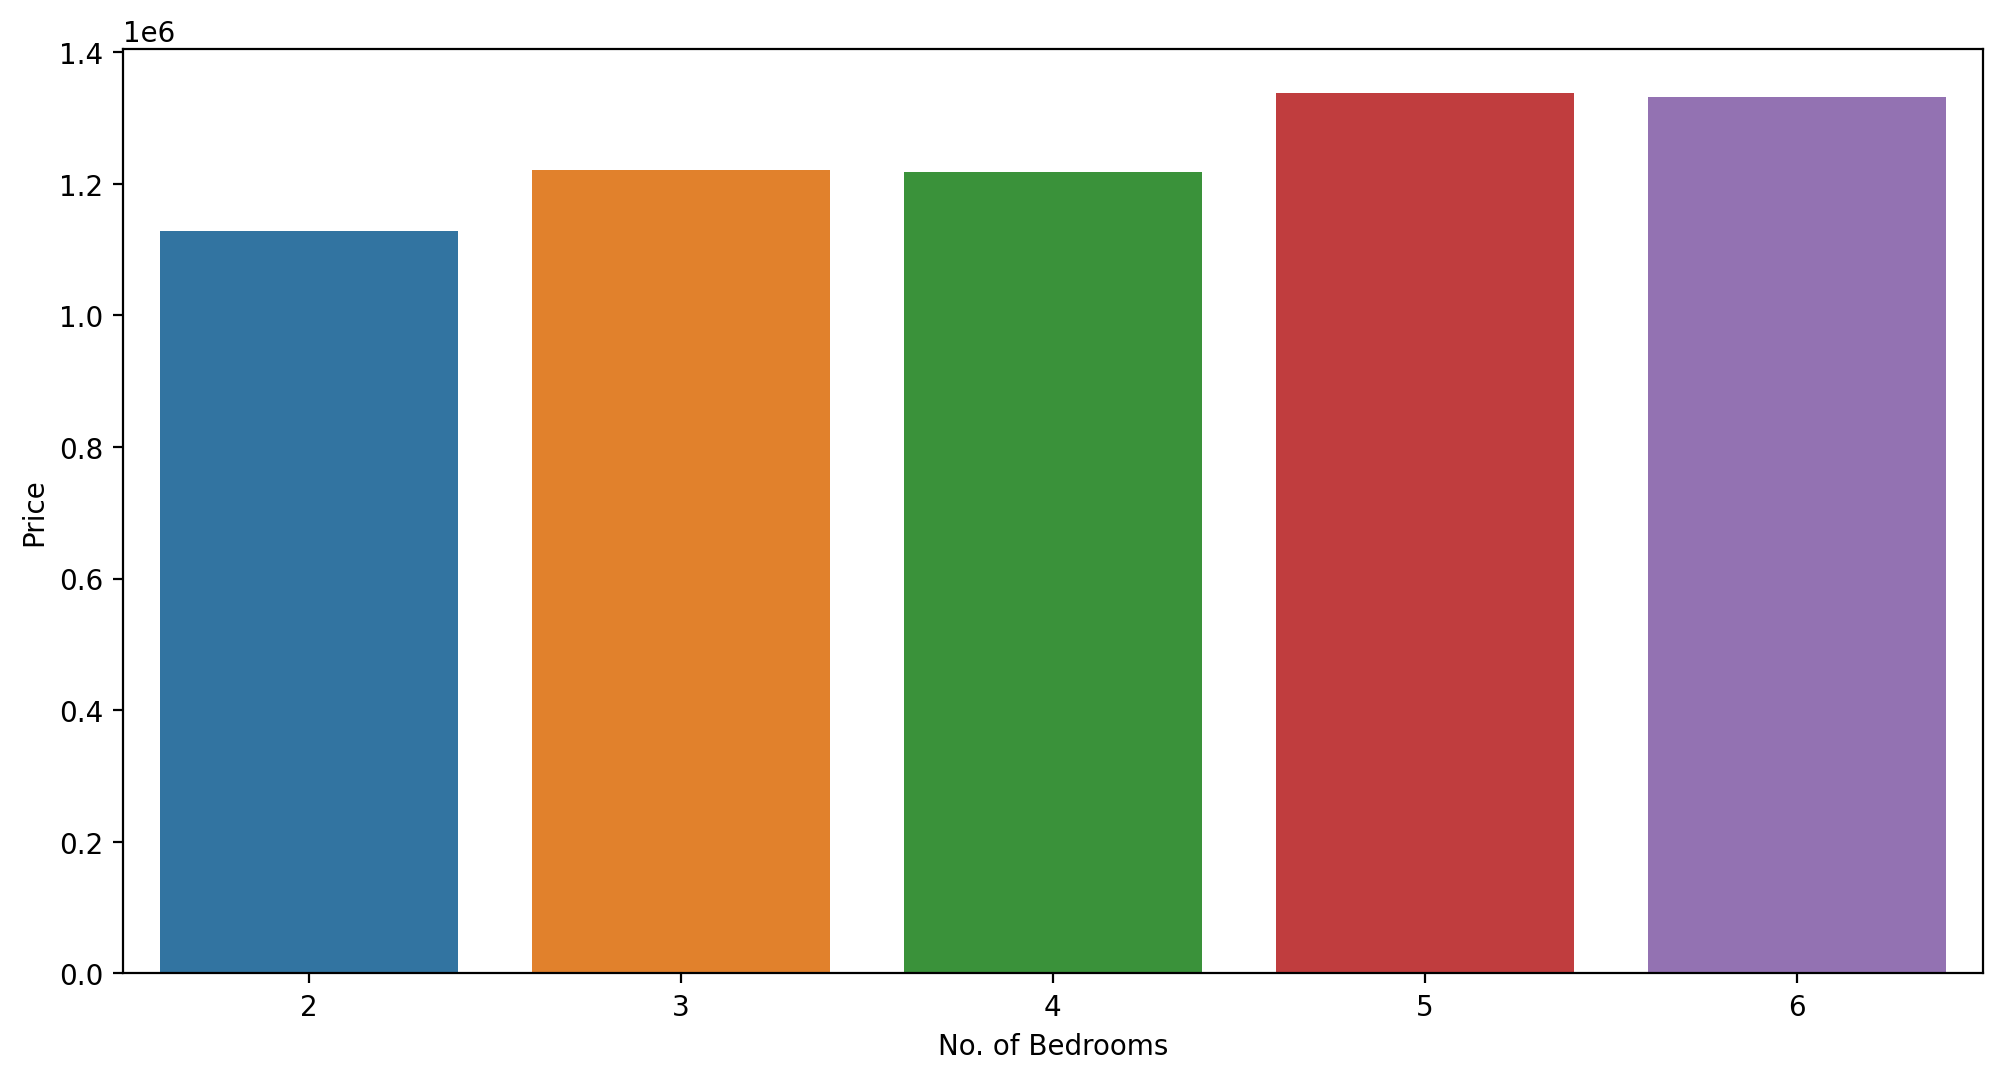

In [12]:
# Price wrt No. of Bedrooms
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'No. of Bedrooms', y = 'Price', data = df, ci = None)

<Axes: xlabel='Population', ylabel='Price'>

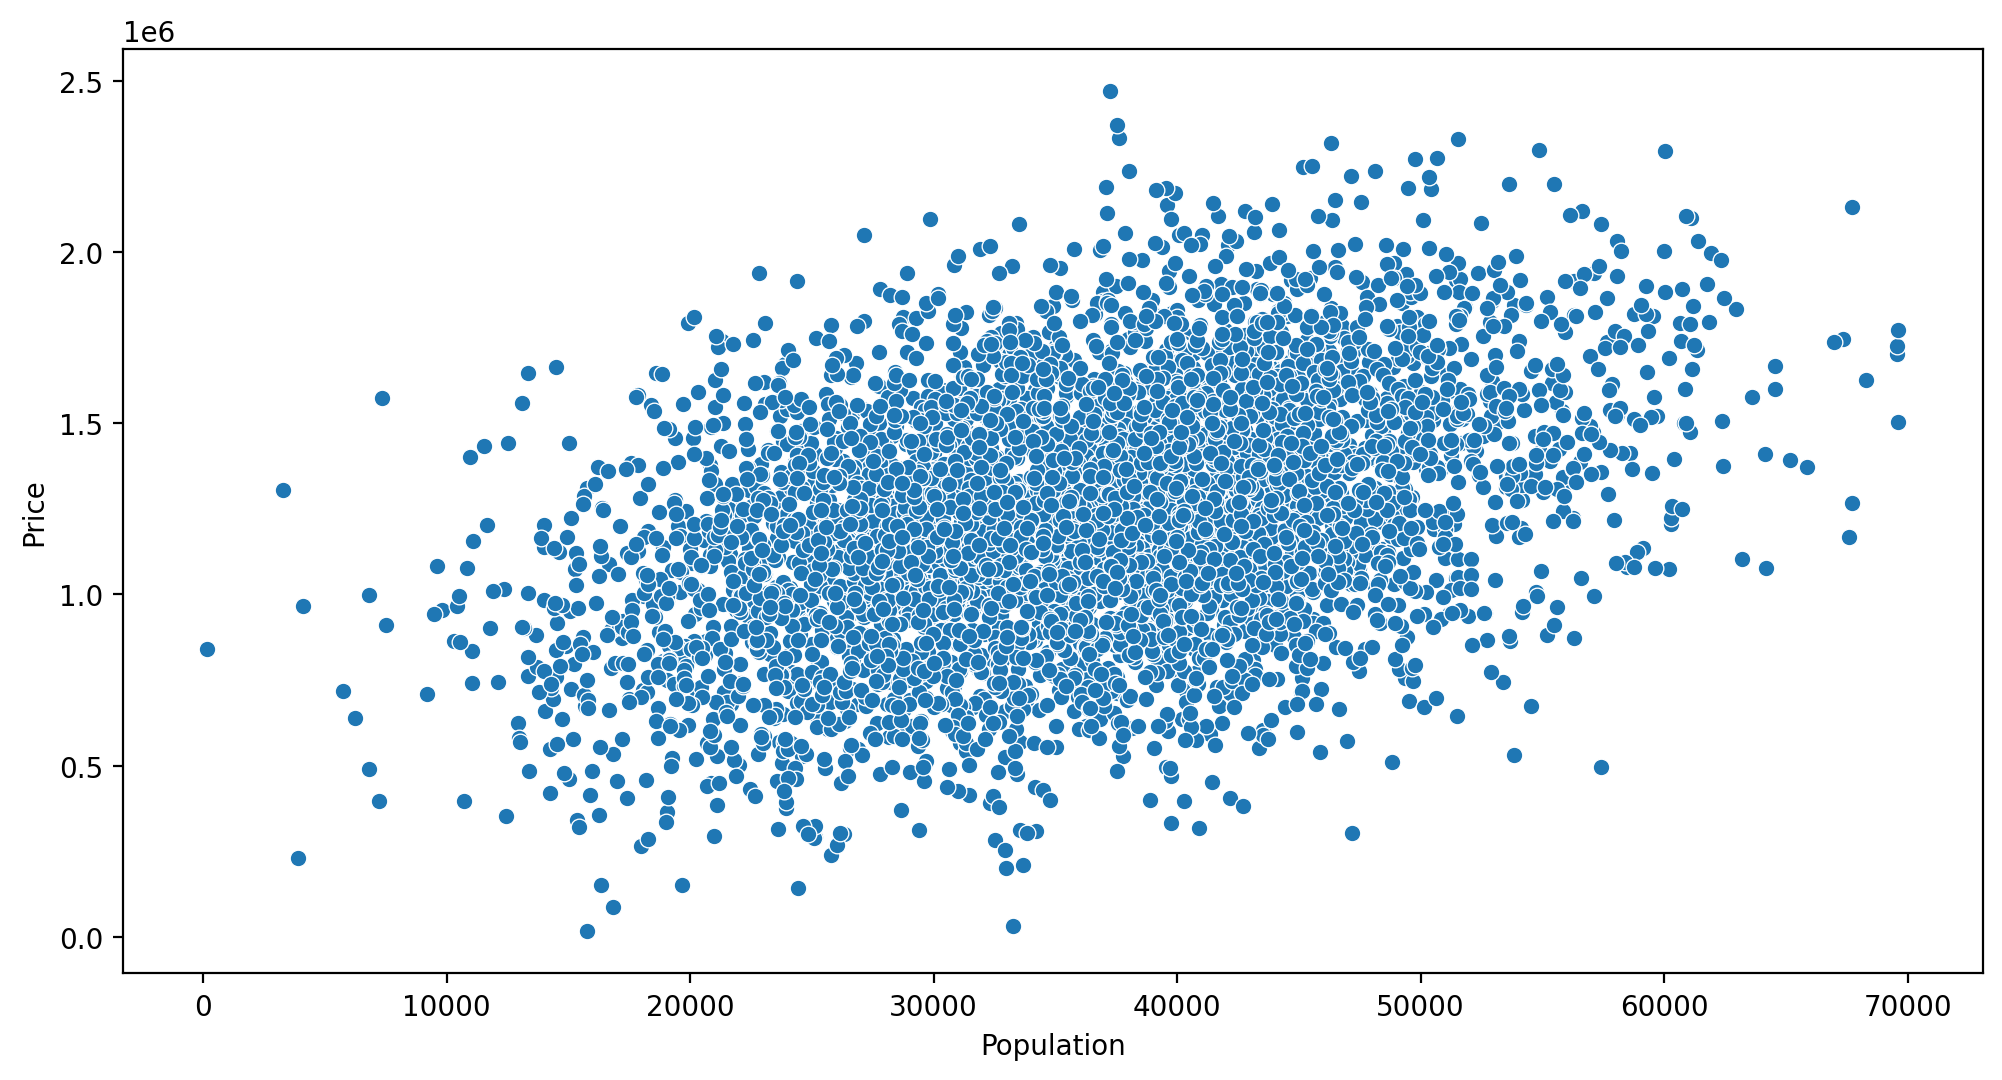

In [13]:
# Price wrt Population
plt.figure(figsize = (12, 6), dpi = 200)
sns.scatterplot(x = 'Population', y = 'Price', data = df)

<Axes: >

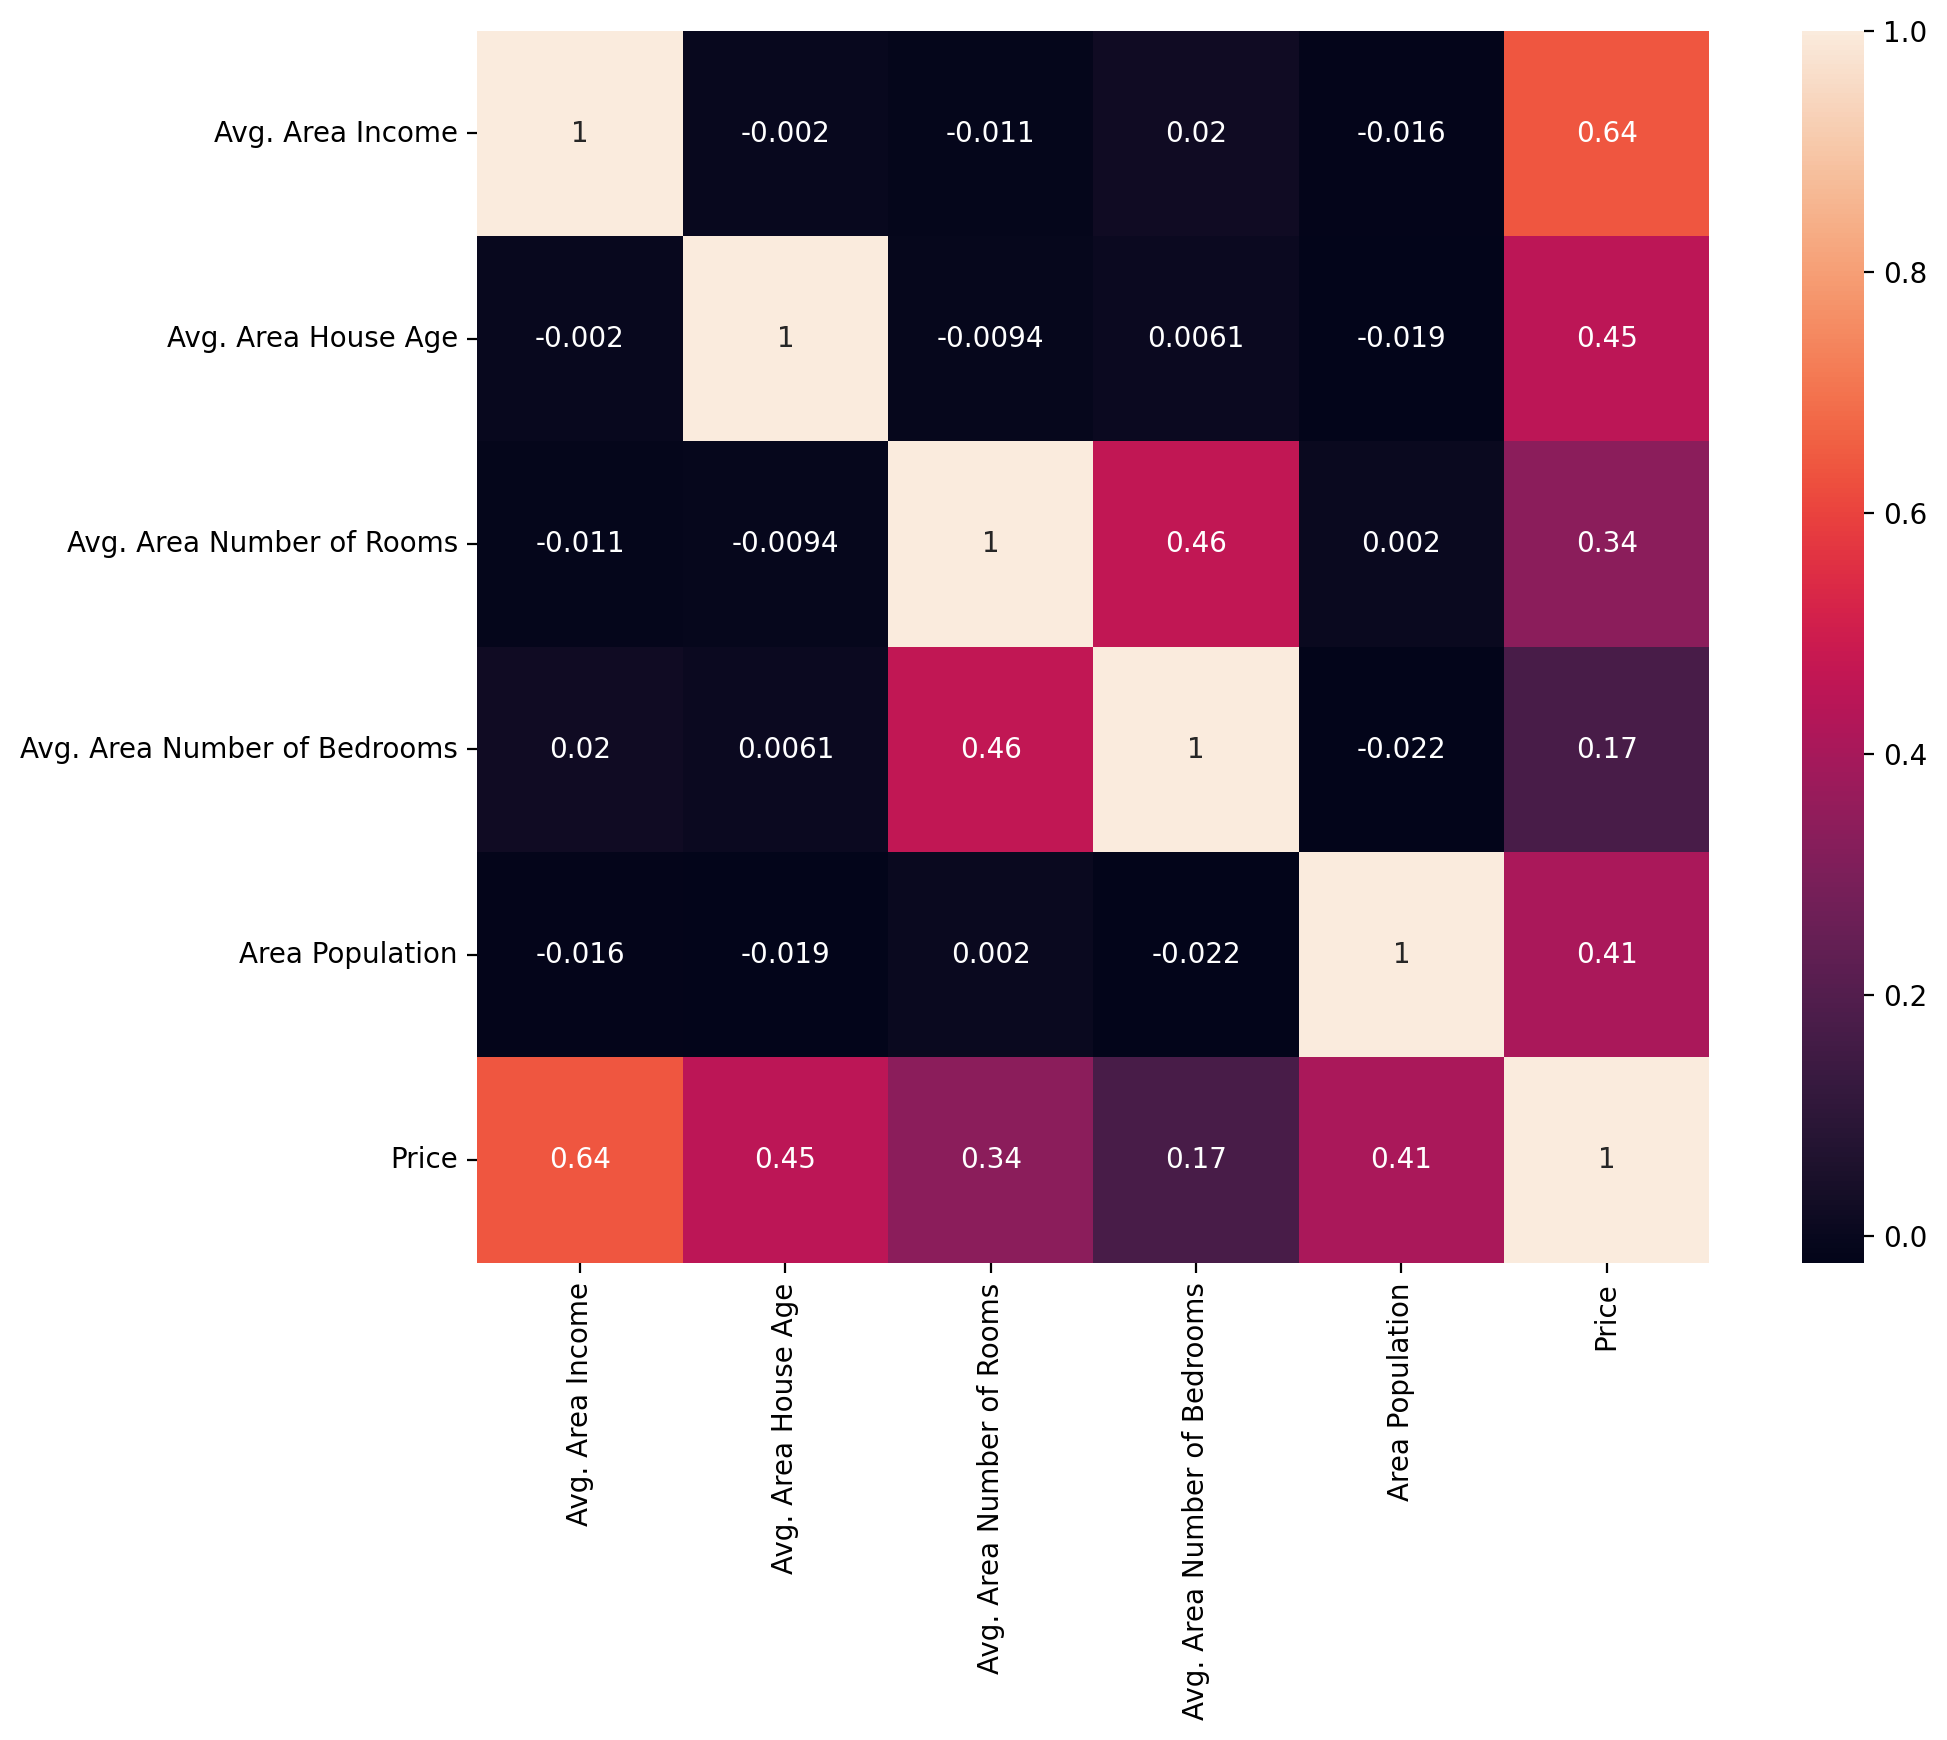

In [14]:
#Heatmap showing correlation
plt.figure(figsize = (12, 8), dpi = 200)
sns.heatmap(data.corr(), annot = True, square = True)

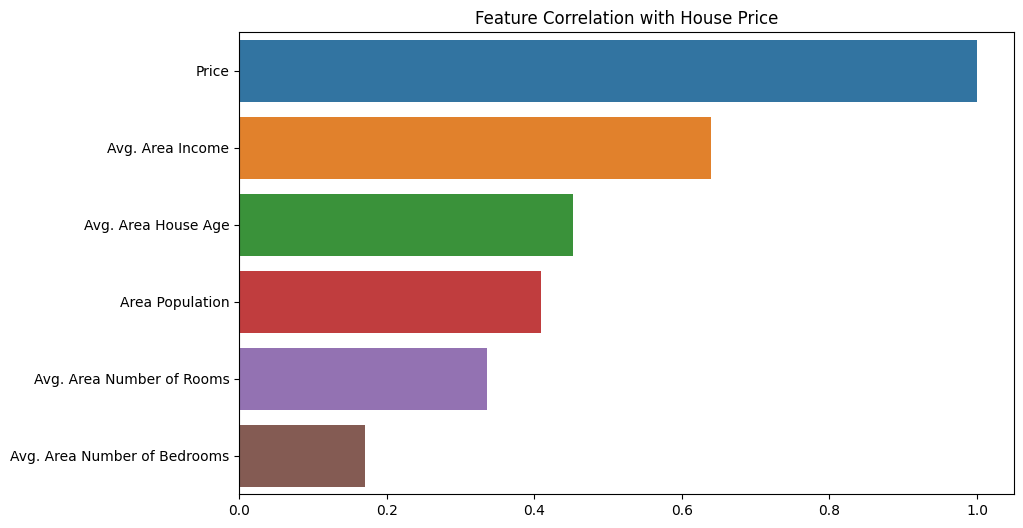

In [15]:
# Correlation with Price
correlation = data.corr()['Price'].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Feature Correlation with House Price')
plt.show()

In [16]:
def categorize_house_age(df):
    max_age = df['Avg. Area House Age'].max()
    bins = [0, 5, 10, max_age]
    labels = ['New', 'Mid-Age', 'Old']
    if max_age <= 10:  # Adjusting bins if max age is less than or equal to 10
        bins = [0, max_age / 3, 2 * max_age / 3, max_age]
    df['House_Age_Category'] = pd.cut(df['Avg. Area House Age'], bins=bins, labels=labels, include_lowest=True)
    return df

data = categorize_house_age(data)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


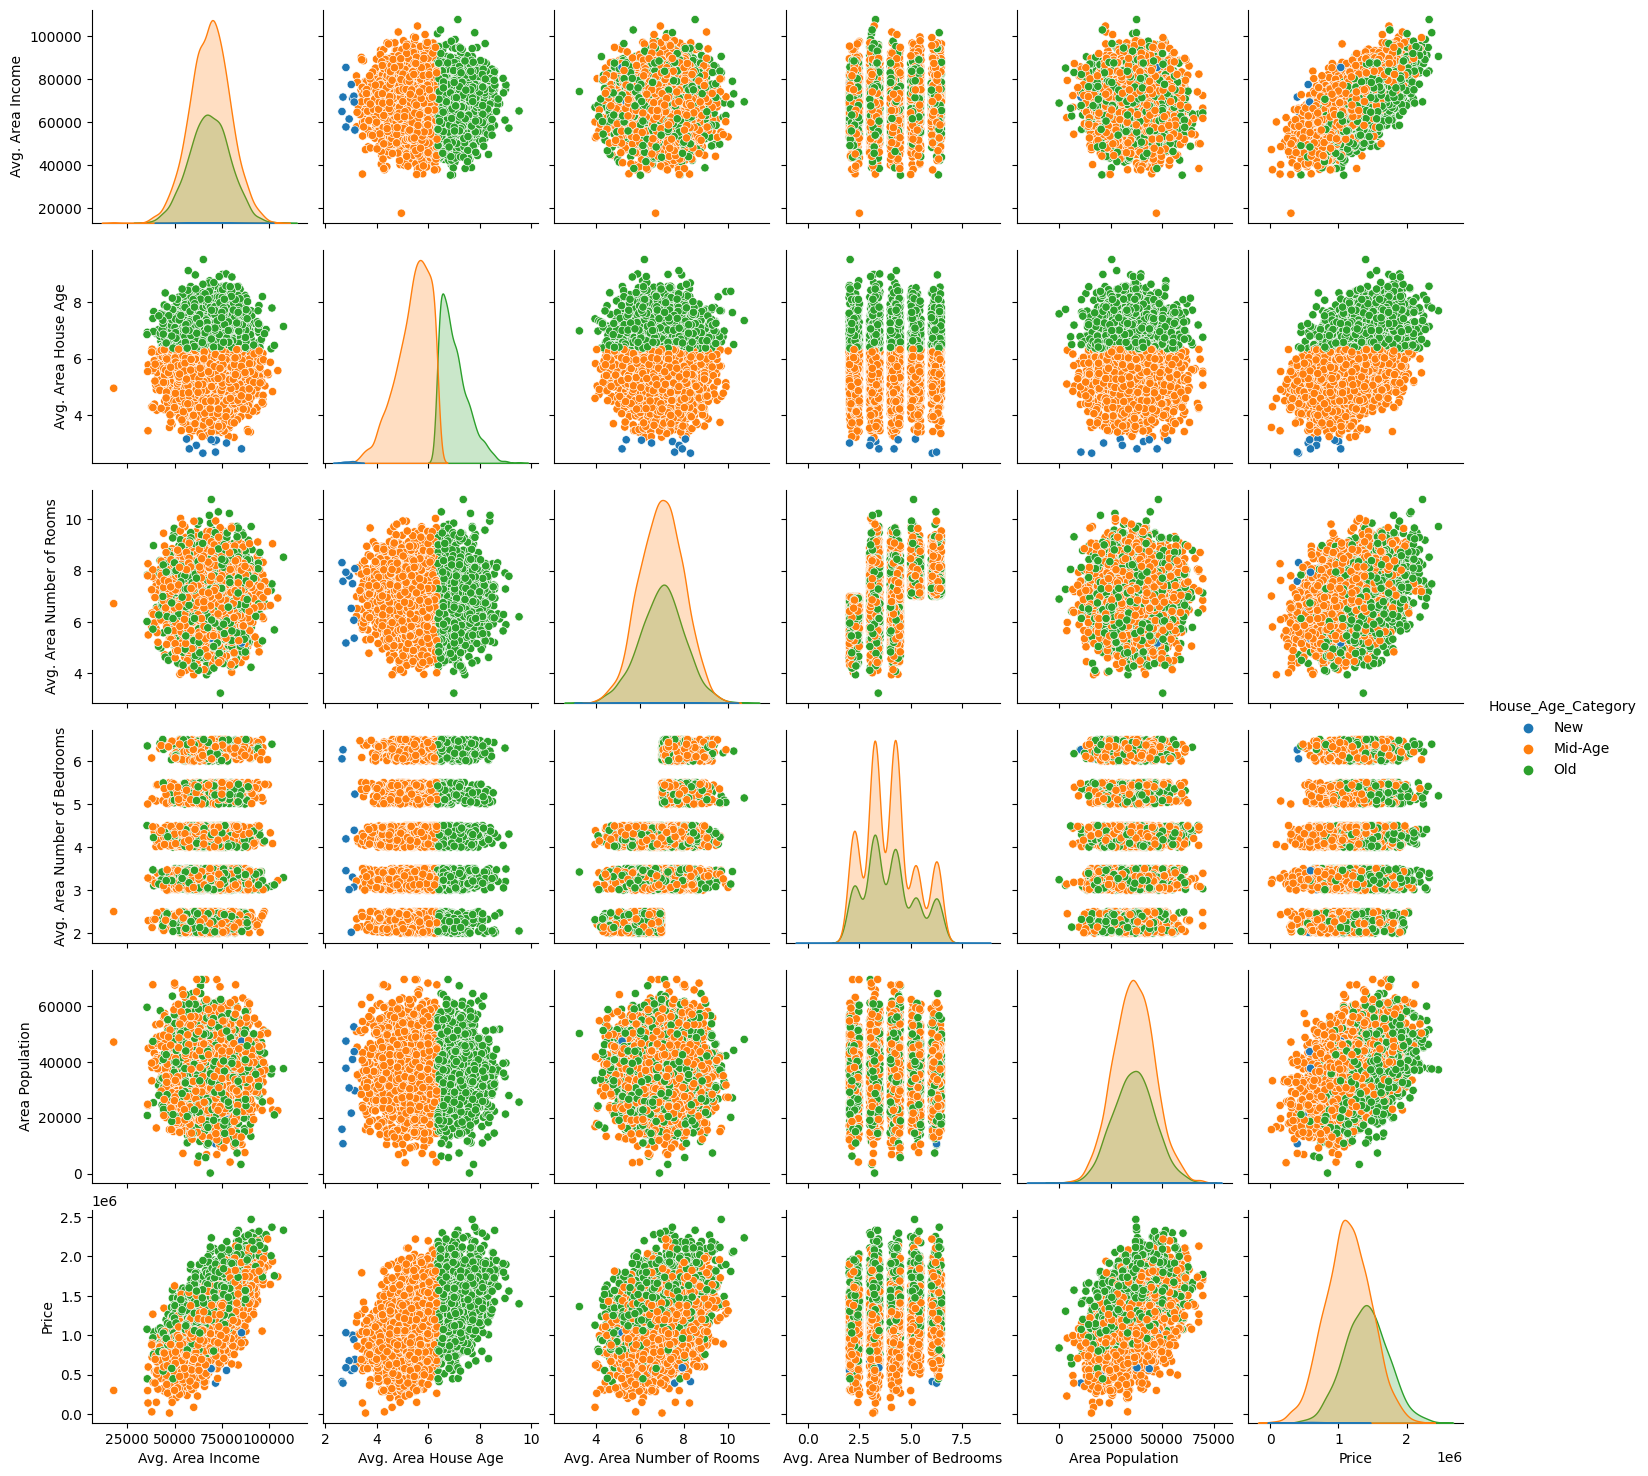

In [17]:
# Pairplot segmented by a new categorical feature (if applicable)
sns.pairplot(data, hue='House_Age_Category')
plt.show()

In [18]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,House_Age_Category
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",Mid-Age
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",Mid-Age
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",Mid-Age
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,Old
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,Mid-Age
...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,Old
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352",Old
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",Old
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316,Mid-Age


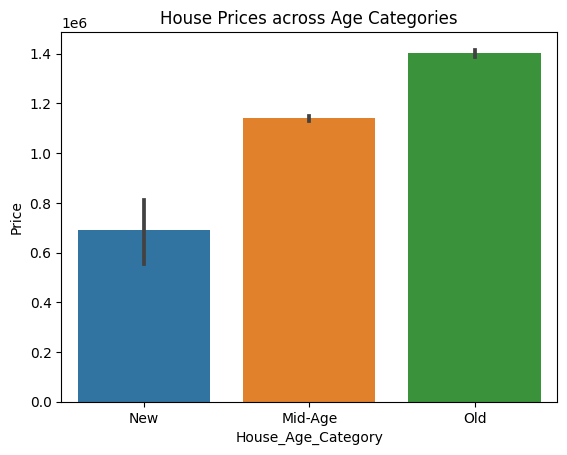

In [19]:
# Boxplot for Prices across different House Age Categories
sns.barplot(x='House_Age_Category', y='Price', data=data)
plt.title('House Prices across Age Categories')
plt.show()

In [20]:
# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=['House_Age_Category'])

In [21]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,House_Age_Category_New,House_Age_Category_Mid-Age,House_Age_Category_Old
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0,1,0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",0,1,0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",0,1,0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,0,0,1
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,0,0,1
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352",0,0,1
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",0,0,1
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316,0,1,0


# Setting Target and Variable and Train Test Split

In [22]:
# Selecting features and target variable
X = data.drop(['Price', 'Address'], axis=1)
y = data['Price']

In [23]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network

In [49]:
# Without Hyperparameter tuning
# Data preprocessing: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on test data
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

32/32 [==============================] - 0s 1ms/step
Mean Squared Error: 27768534443.530163
R-squared: 0.7742991088191149


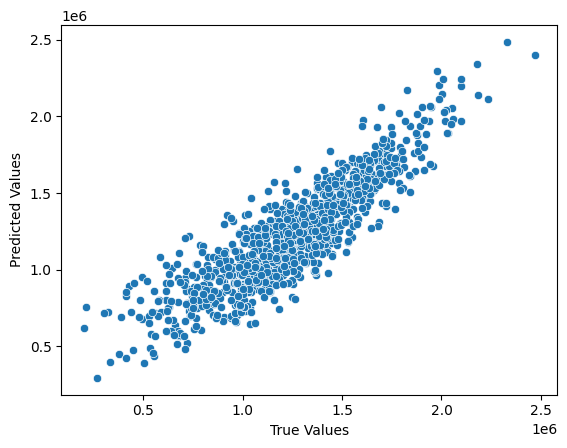

In [51]:
# Reshape predictions to be a 1D array
predictions = predictions.reshape(-1)

# Now, use seaborn to create the scatter plot
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# Support Vector Regression

In [32]:
# Define the model
model = SVR()

# Define the parameters for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'sigmoid']  # Type of kernel
}

# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print results
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best score found:  0.7371812866868026


# Support Vector Regressor Model Evaluation

In [33]:
# Get the best estimator
best_svr = grid_search.best_estimator_

# Make predictions using the best model on the scaled test data
predictions = best_svr.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('Best Parameters:', grid_search.best_params_)

Mean Squared Error: 27963872453.1868
R-squared: 0.7727114138346836
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


Text(0, 0.5, 'Predicted Values')

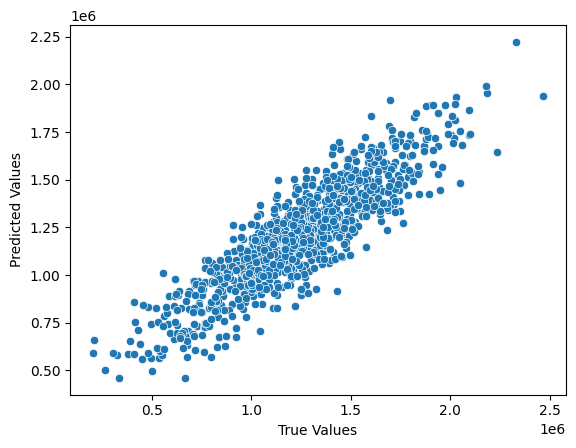

In [35]:
#plot actual and predicted values
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Random Forest Regressor

In [36]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model to the scaled training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Random Forest Model Evaluation

In [37]:

# Make predictions using the best model on the scaled test data
predictions = best_rf.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('Best Parameters:', grid_search.best_params_)

Mean Squared Error: 14280727311.341614
R-squared: 0.8839271518835241
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


Text(0, 0.5, 'Predicted Values')

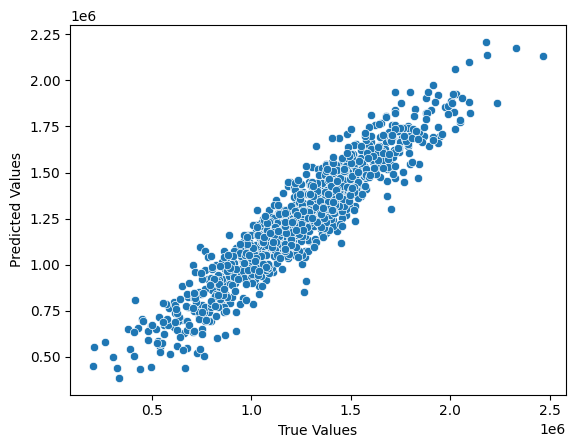

In [39]:
#plot actual and predicted values
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# XGBoost Regressor

In [40]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best estimator
best_xgb = grid_search.best_estimator_

# XGBoost Regressor Model Evaluation

In [41]:
# Make predictions using the best model
predictions = best_xgb.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('Best Parameters:', grid_search.best_params_)

Mean Squared Error: 11091006989.774002
R-squared: 0.9098529968595929
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


In [42]:
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Root Mean Squared Error: 105313.84994279718
Mean Absolute Error: 84342.94300337505


Text(0, 0.5, 'Predicted Values')

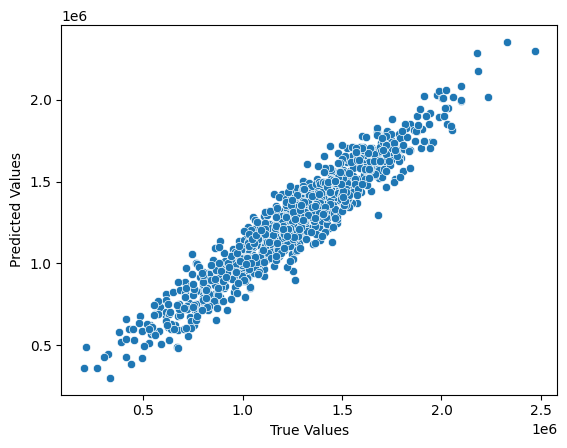

In [44]:
#plot actual and predicted values
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Elastic Net Model

In [45]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Elastic Net model
elastic_net = ElasticNet(random_state=42)

# Define the grid of parameters to search
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator
best_elastic_net = grid_search.best_estimator_

# Make predictions
predictions = best_elastic_net.predict(X_test_scaled)



# Elastic Net Model Evaluation

In [46]:
# Calculate MSE
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print('Best Parameters:', grid_search.best_params_)

Mean Squared Error: 10097788698.683523
R2 Score: 0.9179258122936284
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}


Text(0, 0.5, 'Predicted Values')

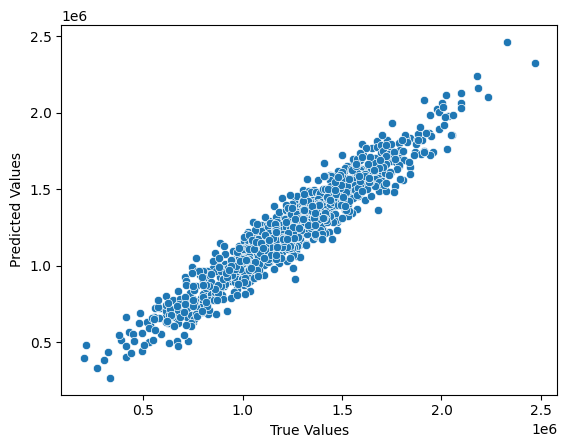

In [48]:
#plot actual and predicted values
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')